# Mô tả các biến

**Nhóm biến về loại trang khách đã truy cập**

1. Administrative

Số lượng trang quản trị / trang thông tin chung mà khách truy cập trong phiên (session).

Ví dụ: trang chính sách, điều khoản, các trang phi sản phẩm.

2. Administrative Duration

Tổng thời gian (giây) mà khách dành trên các trang thuộc nhóm Administrative.

3. Informational

Số lượng trang thông tin mà khách truy cập.

Ví dụ: hướng dẫn, FAQ, giới thiệu sản phẩm theo dạng text, thông tin kỹ thuật.

4. Informational Duration

Tổng thời gian khách dành trên các trang Informational.

5. Product Related

Số lượng trang sản phẩm mà khách xem.


6. Product Related Duration

Tổng thời gian khách dành để xem các trang sản phẩm.


**Nhóm biến về hiệu suất trang**

7. Bounce Rate

Tỷ lệ % khách vào trang rồi thoát ngay mà không thực hiện hành động nào khác.

Bounce Rate cao = khách không quan tâm.

8. Exit Rate

Tỷ lệ % số lần trang đó là trang cuối cùng trước khi khách rời website.

Exit Rate cao tại trang sản phẩm có thể là dấu hiệu xấu.

9. Page Value

Giá trị trung bình của trang đó trong chuỗi dẫn đến chuyển đổi (transaction).

Nếu khách hay xem một trang trước khi mua → Page Value cao.

**Biến liên quan đến thời điểm đặc biệt**

10. Special Day

Giá trị từ 0 1, thể hiện mức độ phiên truy cập gần một ngày đặc biệt (Valentine, Ngày của Mẹ…).

Giá trị cao → khách có xu hướng mua hàng cao hơn

**Biến về thiết bị & nguồn truy cập**

11. Operating System

Hệ điều hành khách sử dụng (Windows, Android, iOS…).

12. Browser

Trình duyệt khách dùng (Chrome, Firefox, Safari…).

13. Region

Khu vực địa lý của khách.

14. Traffic Type

Loại lưu lượng truy cập:

direct (truy cập trực tiếp)

organic (search)

referral (chuyển hướng)

social media, ads, email…

Dùng để phân tích nguồn nào hiệu quả.

15. Visitor Type

Loại khách: Returning Visitor (khách quay lại), New Visitor (khách mới), Other (Khác)

Khách quay lại thường có tỷ lệ mua cao hơn.

16. Weekend

Boolean (True/False)

True nếu phiên truy cập diễn ra vào thứ 7/chủ nhật.

17. Month

Tháng mà phiên truy cập diễn ra.

**Biến mục tiêu (Target Variable)**

18. Revenue

Giá trị Boolean: True nếu khách đã mua, False nếu không.

# **1. Nhập và xử lý dữ liệu**

In [2]:
# Cài đặt các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer       
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, chi2
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.base import clone
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay

from imblearn.over_sampling import BorderlineSMOTE, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468) 
  
# data (as pandas dataframes) 
X = online_shoppers_purchasing_intention_dataset.data.features 
y = online_shoppers_purchasing_intention_dataset.data.targets 
  
# metadata 
print(online_shoppers_purchasing_intention_dataset.metadata) 
  
# variable information 
print(online_shoppers_purchasing_intention_dataset.variables) 


{'uci_id': 468, 'name': 'Online Shoppers Purchasing Intention Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/468/data.csv', 'abstract': 'Of the 12,330 sessions in the dataset,\n84.5% (10,422) were negative class samples that did not\nend with shopping, and the rest (1908) were positive class\nsamples ending with shopping.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 12330, 'num_features': 17, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Revenue'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5F88Q', 'creators': ['C. Sakar', 'Yomi Kastro'], 'intro_paper': {'ID': 367, 'type': 'NATIVE', 'title': 'Real-time prediction of online shoppers’ pur

In [4]:
# tải dữ liệu
from ucimlrepo import fetch_ucirepo 
 
df_original = fetch_ucirepo(id=468).data.original

In [5]:
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
df_original.info()
df_original.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## Loại bỏ các dữ liệu trùng lặp

In [7]:
# Loại bỏ các dữ liệu trùng lặp
df = df_original.drop_duplicates()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType              12

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,0.906823,1.710114,2.402340,4.016654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
# Tỷ lệ biến mục tiêu
print(df['Revenue'].value_counts())
print(df['Revenue'].nunique())
df['Revenue'].unique().tolist()

Revenue
False    10297
True      1908
Name: count, dtype: int64
2


[False, True]

## Tạo các biến thời gian trung bình (TPP)

In [9]:
# Tạo các biến thời gian trung bình trên mỗi trang Administrative, Informational, ProductRelated (TPP = Time Per Page)
df.insert(loc=6, column='Product_TPP', value=np.where(df.ProductRelated_Duration==0,0, df.ProductRelated_Duration / df.ProductRelated).round(2))
df.insert(loc=4, column='Informational_TPP', value=np.where(df.Informational_Duration==0,0, df.Informational_Duration / df.Informational).round(2))
df.insert(loc=2, column='Administrative_TPP', value=np.where(df.Administrative_Duration==0,0, df.Administrative_Duration / df.Administrative).round(2))
df.head()

,Administrative,Administrative_Duration,Administrative_TPP,Informational,Informational_Duration,Informational_TPP,ProductRelated,ProductRelated_Duration,Product_TPP,BounceRates,...,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0,0.0,0.0,1,0.000000,0.00,0.20,...,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0.0,0,0.0,0.0,2,64.000000,32.00,0.00,...,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0.0,0,0.0,0.0,1,0.000000,0.00,0.20,...,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0.0,0,0.0,0.0,2,2.666667,1.33,0.05,...,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0.0,0,0.0,0.0,10,627.500000,62.75,0.02,...,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [10]:
# Xác định danh sách các cột
nominal_features = ["Month", "VisitorType", "Weekend", "OperatingSystems", "Browser", "Region", "TrafficType", "SpecialDay"]
numeric_features = ["Administrative", "Administrative_Duration", "Administrative_TPP", "Informational", 
                    "Informational_Duration", "Informational_TPP", "ProductRelated", "ProductRelated_Duration", 
                    "Product_TPP", "BounceRates", "ExitRates", "PageValues"]

print(len(nominal_features))
print(len(numeric_features))

8
12


## Biểu đồ histogram và boxplot của các biến định lượng

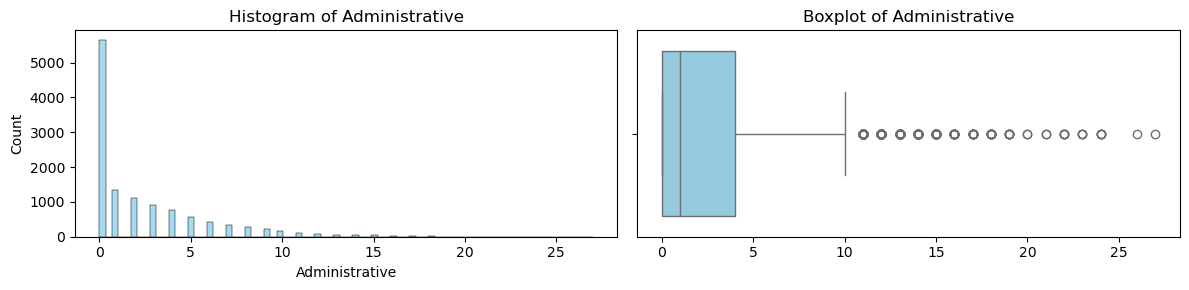

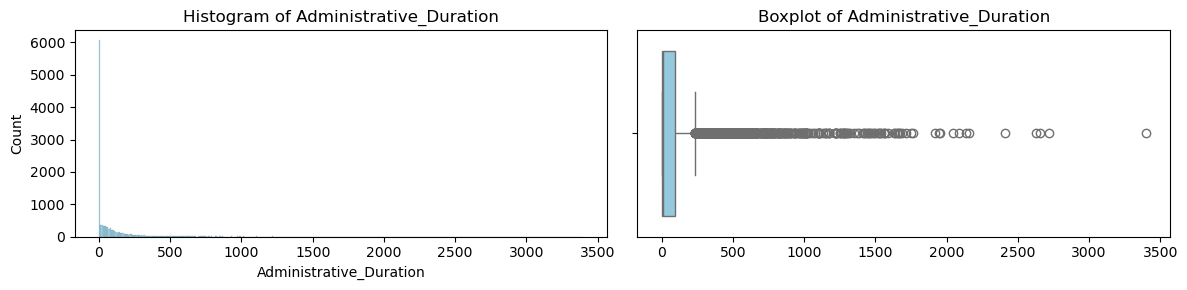

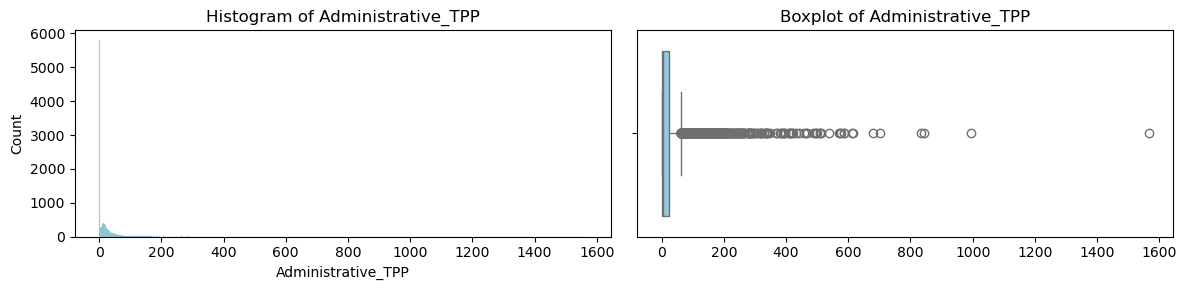

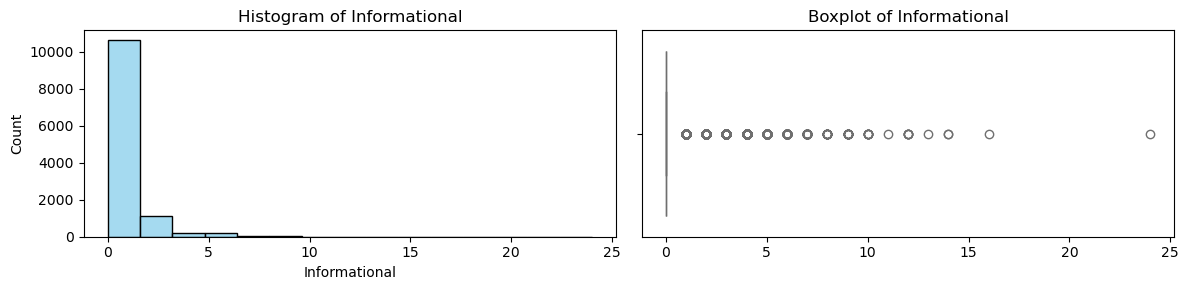

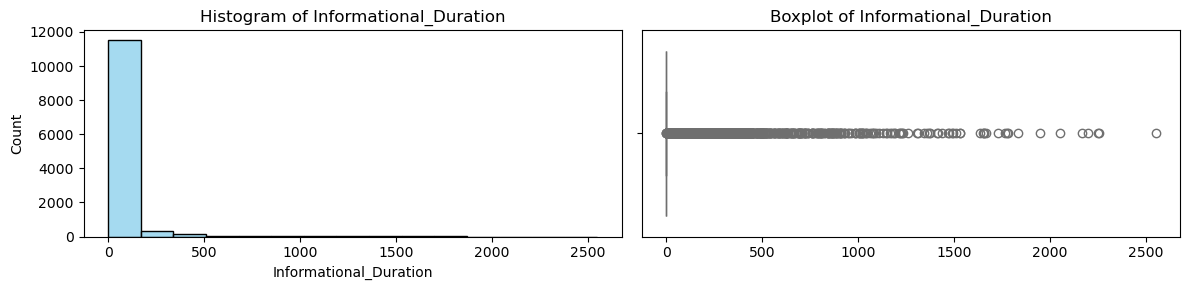

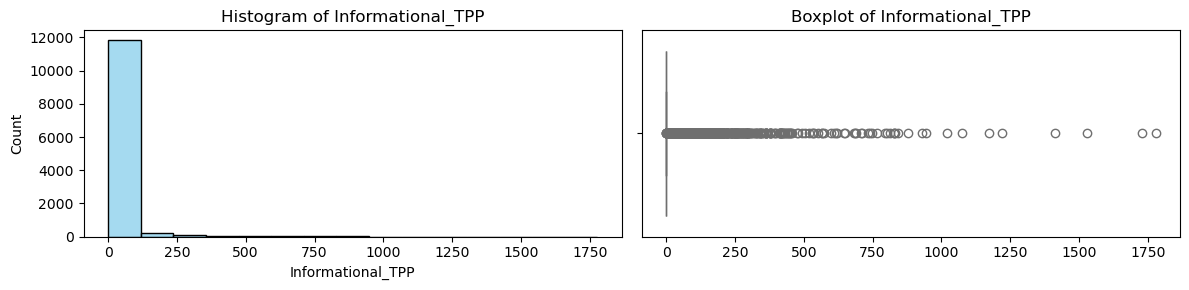

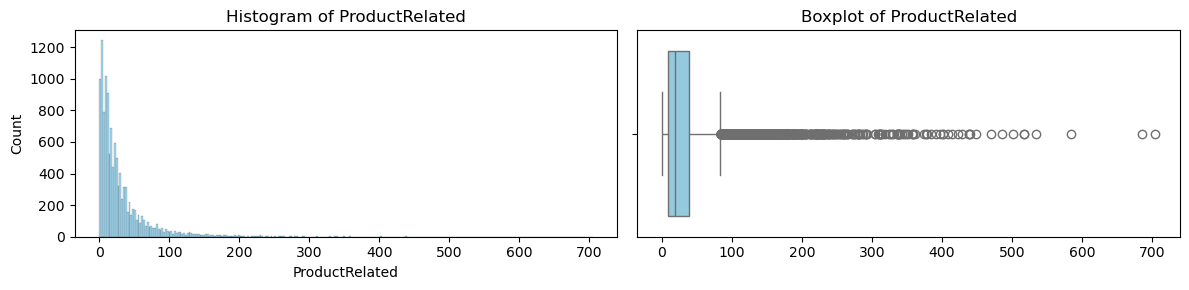

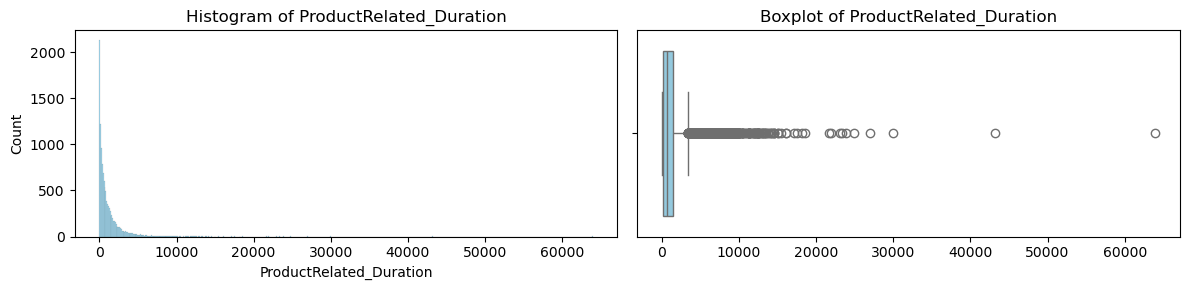

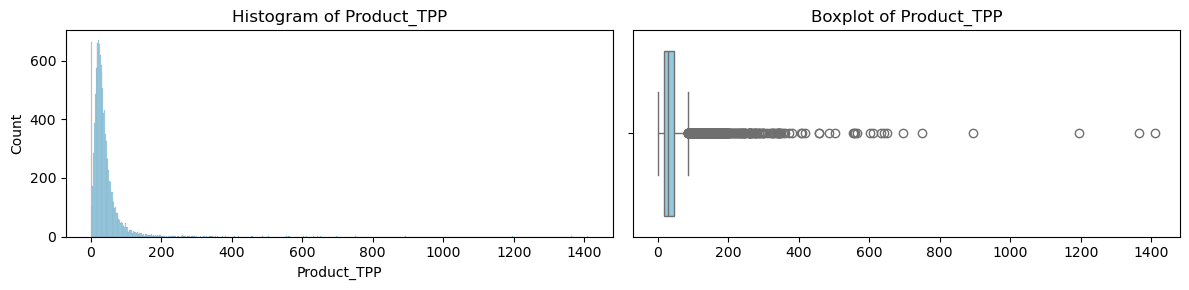

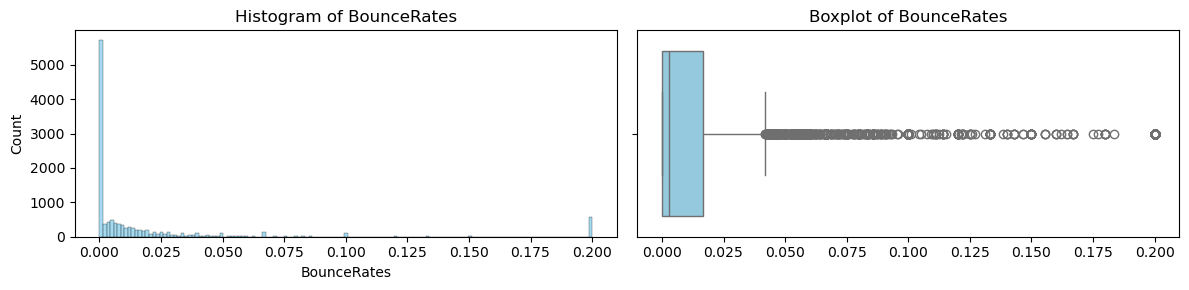

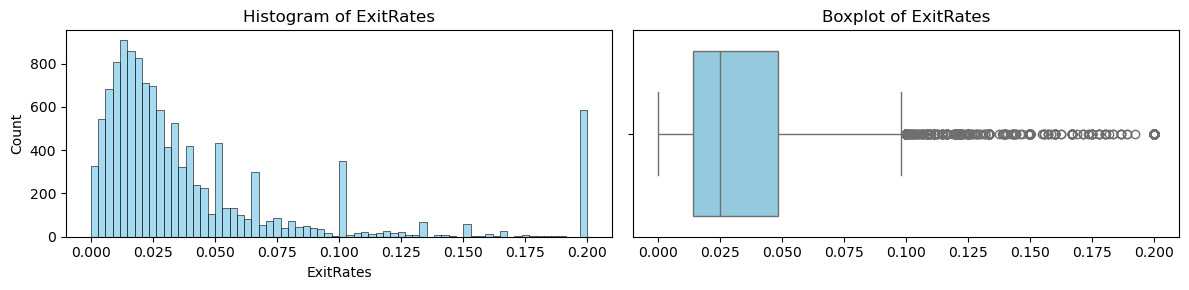

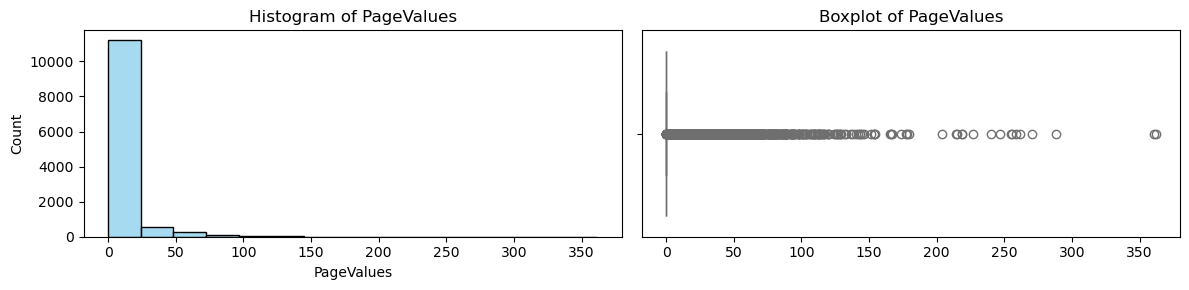

In [11]:
def plot_quantitative_var_distributions(df, var_list):
    for col in var_list:
        plt.figure(figsize=(12, 3))

        # Histogram (Cột 1)
        plt.subplot(1, 2, 1)
        # Sử dụng hàm histplot đơn giản
        sns.histplot(data=df, x=col, color='skyblue', kde=False, ax=plt.gca())
        plt.title(f'Histogram of {col}')
        
        # Boxplot (Cột 2 - luôn luôn vẽ)
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col], color='skyblue')
        plt.title(f'Boxplot of {col}')
        plt.xlabel('')
        
        plt.tight_layout() # Đảm bảo bố cục gọn gàng
        plt.show() # Thêm show() để hiển thị từng figure ngay lập tức

# Gọi hàm
plot_quantitative_var_distributions(df, numeric_features)

## Biểu đồ cột các biến định tính

Số lượng các nhóm trong 'Month':
Month
May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: count, dtype: int64
----------------------------------------


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13512\2672486019.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=vc.index, palette='viridis')


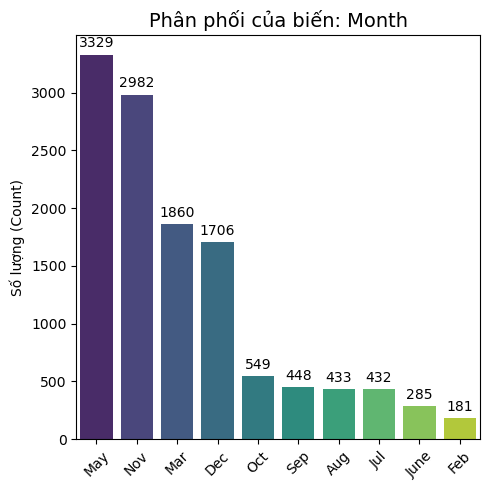

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13512\2672486019.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=vc.index, palette='viridis')


Số lượng các nhóm trong 'VisitorType':
VisitorType
Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: count, dtype: int64
----------------------------------------


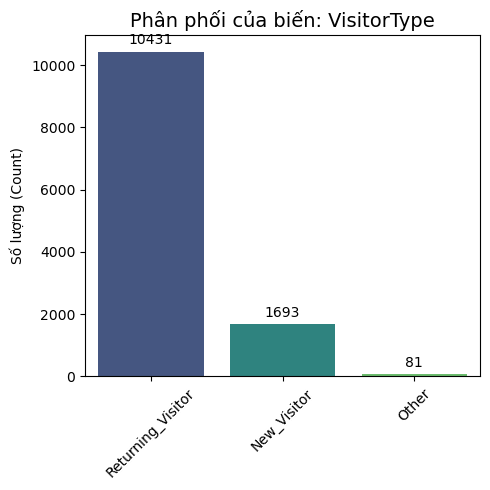

Số lượng các nhóm trong 'Weekend':
Weekend
False    9346
True     2859
Name: count, dtype: int64
----------------------------------------


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13512\2672486019.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=vc.index, palette='viridis')


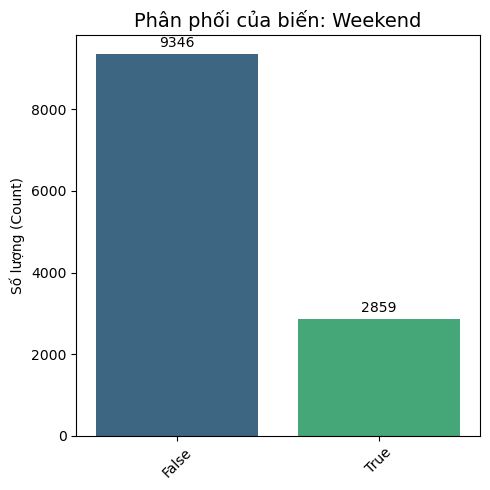

Số lượng các nhóm trong 'OperatingSystems':
OperatingSystems
2    6541
1    2549
3    2530
4     478
8      75
6      19
7       7
5       6
Name: count, dtype: int64
----------------------------------------


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13512\2672486019.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=vc.index, palette='viridis')


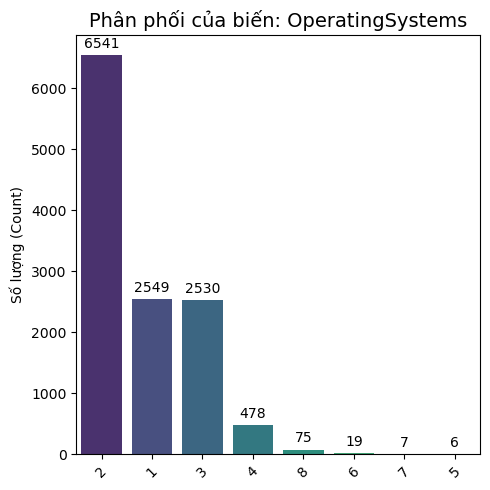

Số lượng các nhóm trong 'Browser':
Browser
2     7883
1     2427
4      731
5      465
6      174
10     163
8      135
3      105
13      56
7       49
12      10
11       6
9        1
Name: count, dtype: int64
----------------------------------------


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13512\2672486019.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=vc.index, palette='viridis')


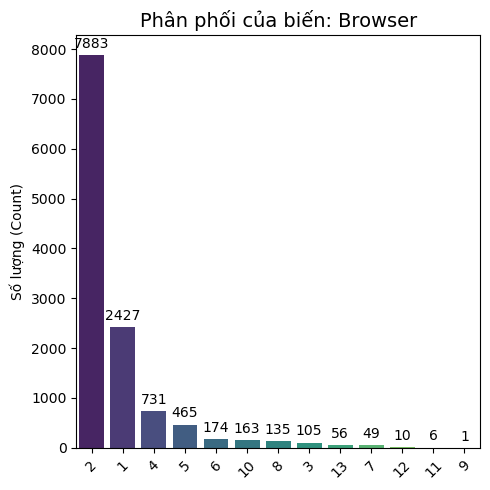

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13512\2672486019.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=vc.index, palette='viridis')


Số lượng các nhóm trong 'Region':
Region
1    4714
3    2379
4    1171
2    1128
6     801
7     758
9     505
8     431
5     318
Name: count, dtype: int64
----------------------------------------


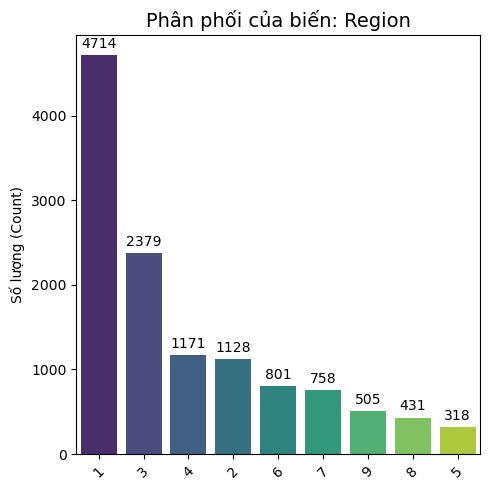

Số lượng các nhóm trong 'TrafficType':
TrafficType
2     3911
1     2388
3     2013
4     1066
13     728
10     450
6      443
8      343
5      260
11     247
20     193
9       41
7       40
15      37
19      17
14      13
18      10
16       3
12       1
17       1
Name: count, dtype: int64
----------------------------------------


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13512\2672486019.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=vc.index, palette='viridis')


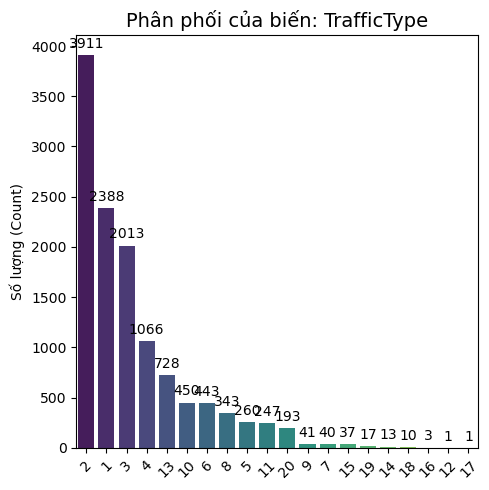

Số lượng các nhóm trong 'SpecialDay':
SpecialDay
0.0    10956
0.6      350
0.8      324
0.4      243
0.2      178
1.0      154
Name: count, dtype: int64
----------------------------------------


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13512\2672486019.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=vc.index, palette='viridis')


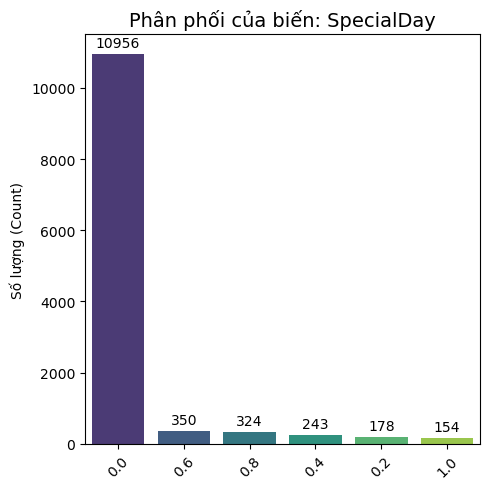

In [12]:
def plot_bars_per_column(df, cols, explode_top=None, autopct='%1.1f%%', save=False, out_prefix='pie'):
    for i, col in enumerate(cols, start=1):
        # tính tỷ lệ
        vc = df[col].value_counts()
        labels = vc.index.astype(str)
        sizes = vc.values
        
        print(f"Số lượng các nhóm trong '{col}':")
        print(vc)
        print("-" * 40)

        plt.figure(figsize=(5,5))
        ax = sns.countplot(data=df, x=col, order=vc.index, palette='viridis')
        
        # 4. Trang trí
        plt.title(f'Phân phối của biến: {col}', fontsize=14)
        plt.xlabel(None)
        plt.ylabel('Số lượng (Count)')
        
        # Xoay nhãn trục X nếu tên quá dài
        plt.xticks(rotation=45)
        
        # 5. Thêm nhãn số liệu (Data Labels) lên đầu cột
        for container in ax.containers:
            ax.bar_label(container, padding=3)

        # Hiển thị
        plt.tight_layout()
        plt.show()

# --- GỌI HÀM ---
# nominal_features là danh sách các cột phân loại của bạn
# Ví dụ: ['Month', 'VisitorType', 'Weekend']
plot_bars_per_column(df, nominal_features)

## Correlation heatmap

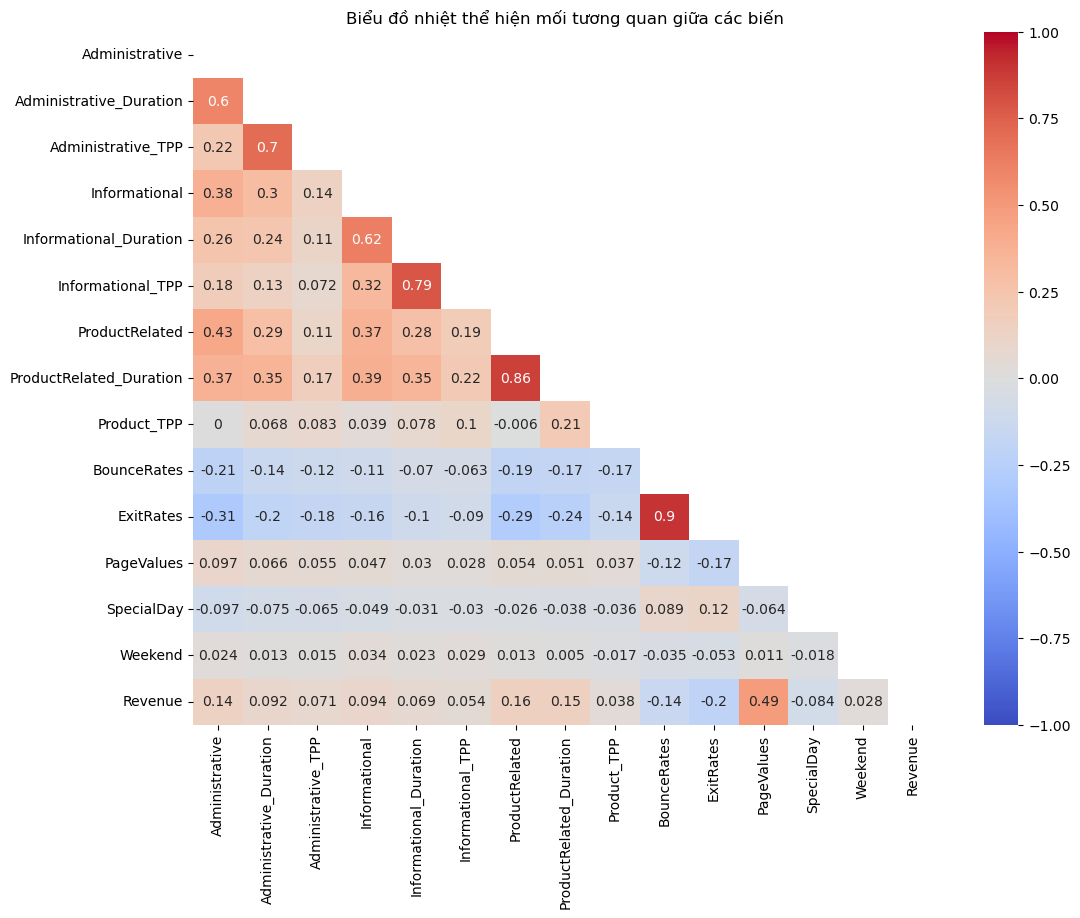

In [13]:
# Tạo dữ liệu df_corr
df_corr = df.copy()
df_corr = df.drop(['Month', 'VisitorType', "OperatingSystems", "Browser", "Region", "TrafficType"], axis=1)

# Vẽ biểu đồ nhiệt
mask = np.zeros_like(df_corr.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,9))
sns.heatmap(df_corr.corr().round(3), mask=mask, annot=True, center=0, cmap='coolwarm', vmax=1, vmin=-1)
plt.title('Biểu đồ nhiệt thể hiện mối tương quan giữa các biến')
plt.show()

# **2. Sử dụng mô hình học máy**

## Tạo tập train và test

In [14]:
# Tách X (features) và y (target)
X = df.drop(['Revenue'], axis=1)
y = df['Revenue']

In [15]:
# Thực hiện chia dữ liệu 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,      # 20% cho tập Test
                                                    random_state=42, 
                                                    stratify=y)

print(f"Kích thước X_train: {X_train.shape}")
print(f"Kích thước X_test: {X_test.shape}")
print(f"Tỷ lệ y_train: \n{y_train.value_counts(normalize=True)}")
print(f"Tỷ lệ y_test: \n{y_test.value_counts(normalize=True)}")

Kích thước X_train: (9764, 20)
Kích thước X_test: (2441, 20)
Tỷ lệ y_train: 
Revenue
False    0.843712
True     0.156288
Name: proportion, dtype: float64
Tỷ lệ y_test: 
Revenue
False    0.843507
True     0.156493
Name: proportion, dtype: float64


## Tạo Pipeline

*Ví dụ với mô hình Decision Tree*

In [16]:
# # Pipeline xử lý dữ liệu
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', RobustScaler(), numeric_features),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), nominal_features)
#     ])

# # Sử sụng Sampling
# over = BorderlineSMOTE(sampling_strategy=0.3, k_neighbors=6, random_state=42)
# under = RandomUnderSampler(sampling_strategy=0.4, random_state=42)
# model = DecisionTreeClassifier(random_state=42)

# pipe = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('oversample', over),
#     ('undersample', under),
#     ('model', model) 
#     ])

# # Định nghĩa chiến lược chia K-Fold
# cv = KFold(n_splits=5, shuffle=True, random_state=42)

# # Chọn các thước đo đánh giá
# scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# # Tính điểm
# cv_scores_lg = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring)

# # Tính trung bình các thang đo sau khi dùng K-fold
# metrics = ["test_accuracy", "test_precision", "test_recall", "test_f1", "test_roc_auc"]
# mean_cv_scores_lg = {m: np.mean(cv_scores[m]).round(4) for m in metrics}
# print('Trung bình:', mean_cv_scores_lg)

# # Tính độ lệch chuẩn
# std_cv_scores_lg = {m: np.std(cv_scores_lg[m]).round(4) for m in metrics}
# print('Độ lệch chuẩn:', std_cv_scores_lg)

### Pipeline xử lý dữ liệu

In [17]:
# Pipeline xử lý dữ liệu
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), nominal_features)
    ])

# Sử sụng Sampling
over = BorderlineSMOTE(sampling_strategy=0.3, k_neighbors=6, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.4, random_state=42)
model = DecisionTreeClassifier()

# Định nghĩa Pipeline (Giữ nguyên)
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversample', over),
    ('undersample', under),
    ('model', model) 
])

### Dùng GridSearchCV tìm các tham số sao cho mô hình có F1 score tốt nhất

In [26]:
# --- MÔ HÌNH 1: LOGISTIC REGRESSION ---
lg_params = {
    'model': [LogisticRegression(random_state=42, max_iter=2000)], # Tăng max_iter để tránh lỗi không hội tụ
    'model__C': [0.01, 0.1, 1, 10, 100],     # Nghịch đảo của Regularization (C nhỏ = phạt mạnh)
    'model__solver': ['lbfgs', 'liblinear'], # Thuật toán tối ưu hóa
    'model__class_weight': [None, 'balanced'] # Thử xem có cần balanced weight không
}

# --- MÔ HÌNH 2: DECISION TREE ---
dt_params = {
    'model': [DecisionTreeClassifier(random_state=42)],
    'model__max_depth': [None, 10, 20],      # Độ sâu tối đa
    'model__min_samples_leaf': [1, 2, 5, 10],    # Số mẫu tối thiểu ở lá
    'model__criterion': ['gini', 'entropy']  # Tiêu chuẩn tách
}

# --- MÔ HÌNH 3: RANDOM FOREST ---
rf_params = {
    'model': [RandomForestClassifier(random_state=42)],
    'model__n_estimators': [100, 200],       # Số lượng cây (càng nhiều càng ổn định nhưng chậm)
    'model__max_depth': [None, 10, 20],      # Độ sâu tối đa (chống overfitting)
    'model__min_samples_leaf': [1, 2, 5],    # Số mẫu tối thiểu ở lá
    'model__criterion': ['gini', 'entropy']  # Tiêu chuẩn tách
}

# --- MÔ HÌNH 4: SUPPORT VECTOR MACHINE (SVM) ---
svm_params = {
    'model': [SVC(random_state=42, probability=True)], # probability=True để tính được ROC_AUC
    'model__C': [0.1, 1, 10, 100],           # Quan trọng nhất: Cân bằng giữa biên rộng và phân loại đúng
    'model__kernel': ['rbf'],                # Loại nhân (RBF: dùng cho phi tuyến)
    'model__gamma': ['scale', 'auto']        # Hệ số kernel cho RBF
}

# Gom tất cả vào một danh sách để chạy vòng lặp
search_spaces = [lg_params, dt_params, rf_params, svm_params]

In [27]:
best_models = {}
cv = KFold(n_splits=5, shuffle=True, random_state=42)

for params in search_spaces:
    # Lấy tên mô hình hiện tại để in ra cho đẹp
    model_name = params['model'][0].__class__.__name__
    print(f"Đang chạy Grid Search cho: {model_name}...")
    
    # Khởi tạo GridSearchCV
    grid = GridSearchCV(
        estimator=pipe,
        param_grid=params,
        cv=cv,               
        scoring='f1',       # Ưu tiên tối ưu
        n_jobs=-1,          # Chạy song song tất cả CPU
        verbose=1           # Hiện tiến trình
    )
    
# --- BẮT ĐẦU BẤM GIỜ ---
    start_time = time.time()
    
    # Huấn luyện
    grid.fit(X_train, y_train)
    
    # --- KẾT THÚC BẤM GIỜ ---
    end_time = time.time()
    
    # Tính tổng thời gian (giây)
    duration = end_time - start_time
    
    # Lưu kết quả
    best_models[model_name] = grid.best_estimator_
    
    # In kết quả
    print(f"   ✅ Best Params: {grid.best_params_}")
    print(f"   ✅ Best F1 Score: {grid.best_score_:.4f}")
    
    # --- IN THỜI GIAN RA MÀN HÌNH ---
    # Nếu chạy nhanh (< 60s) thì hiện giây, nếu lâu thì đổi sang phút
    if duration < 60:
        print(f"   ⏱️ Thời gian chạy: {duration:.2f} giây\n")
    else:
        minutes = int(duration // 60)
        seconds = duration % 60
        print(f"   ⏱️ Thời gian chạy: {minutes} phút {seconds:.0f} giây\n")

print("--- HOÀN TẤT ---")

Đang chạy Grid Search cho: LogisticRegression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
   ✅ Best Params: {'model': LogisticRegression(max_iter=2000, random_state=42), 'model__C': 0.01, 'model__class_weight': None, 'model__solver': 'liblinear'}
   ✅ Best F1 Score: 0.6166
   ⏱️ Thời gian chạy: 40.22 giây

Đang chạy Grid Search cho: DecisionTreeClassifier...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
   ✅ Best Params: {'model': DecisionTreeClassifier(random_state=42), 'model__criterion': 'gini', 'model__max_depth': 10, 'model__min_samples_leaf': 10}
   ✅ Best F1 Score: 0.6248
   ⏱️ Thời gian chạy: 25.79 giây

Đang chạy Grid Search cho: RandomForestClassifier...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
   ✅ Best Params: {'model': RandomForestClassifier(random_state=42), 'model__criterion': 'entropy', 'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__n_estimators': 200}
   ✅ Best F1 Score: 0.6792
   ⏱️ Thời gian chạ

### Kết quả tất cả các thước đo của các mô hình vừa tìm được trên tập Train

In [42]:
# 1. Chuẩn bị danh sách các mô hình
final_models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, C=0.01, solver='liblinear', class_weight=None, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, criterion='gini', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, min_samples_leaf=1, max_depth=20, criterion='entropy', random_state=42),
    'SVM': SVC(C=100, kernel='rbf', gamma='scale', probability=True, random_state=42)
}

# 2. Định nghĩa các thước đo
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# 3. Chuẩn bị K-Fold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. Khởi tạo DataFrame để lưu kết quả cuối cùng
results_df = pd.DataFrame()

# --- BẮT ĐẦU VÒNG LẶP ---
print("Đang đánh giá các mô hình...")

for name, model in final_models.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('oversample', over),
        ('undersample', under),
        ('model', model)
    ])
    
    cv_results = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    
    row_result = {'Model': name}
    for metric in scoring:
        key = f"test_{metric}"
        mean = cv_results[key].mean()
        std = cv_results[key].std()
        
        row_result[metric] = mean
        row_result[f'{metric}_std'] = std
    
    results_df = pd.concat([results_df, pd.DataFrame([row_result])], ignore_index=True)

print("\n✅ HOÀN TẤT! Bảng so sánh kết quả:")

# 5. Hiển thị bảng kết quả (Sắp xếp theo F1-score giảm dần)
# Set index là tên Model
final_table = results_df.set_index('Model')

# Hiển thị các cột điểm trung bình (bỏ qua cột std cho gọn mắt lúc in)
display_cols = []
for metric in scoring:
    display_cols.append(metric)          # Cột trung bình
    display_cols.append(f'{metric}_std') # Cột độ lệch chuẩn tương ứng

# In ra bảng với các cột đã sắp xếp
# Dùng round(4) để làm tròn số cho gọn
print(final_table[display_cols].round(4))


Đang đánh giá các mô hình...

✅ HOÀN TẤT! Bảng so sánh kết quả:
                     accuracy  accuracy_std  precision  precision_std  recall  \
Model                                                                           
Logistic Regression    0.8873        0.0118     0.6602         0.0268  0.5791   
Decision Tree          0.8773        0.0101     0.5988         0.0129  0.6543   
Random Forest          0.9017        0.0097     0.6949         0.0246  0.6654   
SVM                    0.8868        0.0095     0.6306         0.0186  0.6710   

                     recall_std      f1  f1_std  roc_auc  roc_auc_std  
Model                                                                  
Logistic Regression      0.0342  0.6166  0.0282   0.8960       0.0126  
Decision Tree            0.0443  0.6248  0.0239   0.8824       0.0134  
Random Forest            0.0320  0.6792  0.0208   0.9261       0.0078  
SVM                      0.0279  0.6498  0.0165   0.8965       0.0135  


### Đánh giá cuối cùng trên tập test

#### Các chỉ số cơ bản

In [46]:
results_test = []

for name, model in final_models.items():
    model_fresh = clone(model)
    over_fresh = clone(over)
    under_fresh = clone(under)
    preprocessor_fresh = clone(preprocessor)
    
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('oversample', over),
        ('undersample', under),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    
    y_prob = pipe.predict_proba(X_test)[:, 1]
    
    res = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_prob)
    }
    
    results_test.append(res)

df_test_results = pd.DataFrame(results_test).set_index('Model')

print("\nKẾT QUẢ ĐÁNH GIÁ TRÊN TẬP TEST:")
display(df_test_results)


KẾT QUẢ ĐÁNH GIÁ TRÊN TẬP TEST:


,Accuracy,Precision,Recall,F1-Score,AUC
Model,,,,,
Logistic Regression,0.892667,0.672414,0.612565,0.641096,0.908669
Decision Tree,0.878329,0.593819,0.704188,0.644311,0.893458
Random Forest,0.897993,0.670077,0.685864,0.677878,0.928192
SVM,0.887751,0.627358,0.696335,0.660050,0.906151


#### Confusion Matrix

Đang vẽ Confusion Matrix trên tập Test...


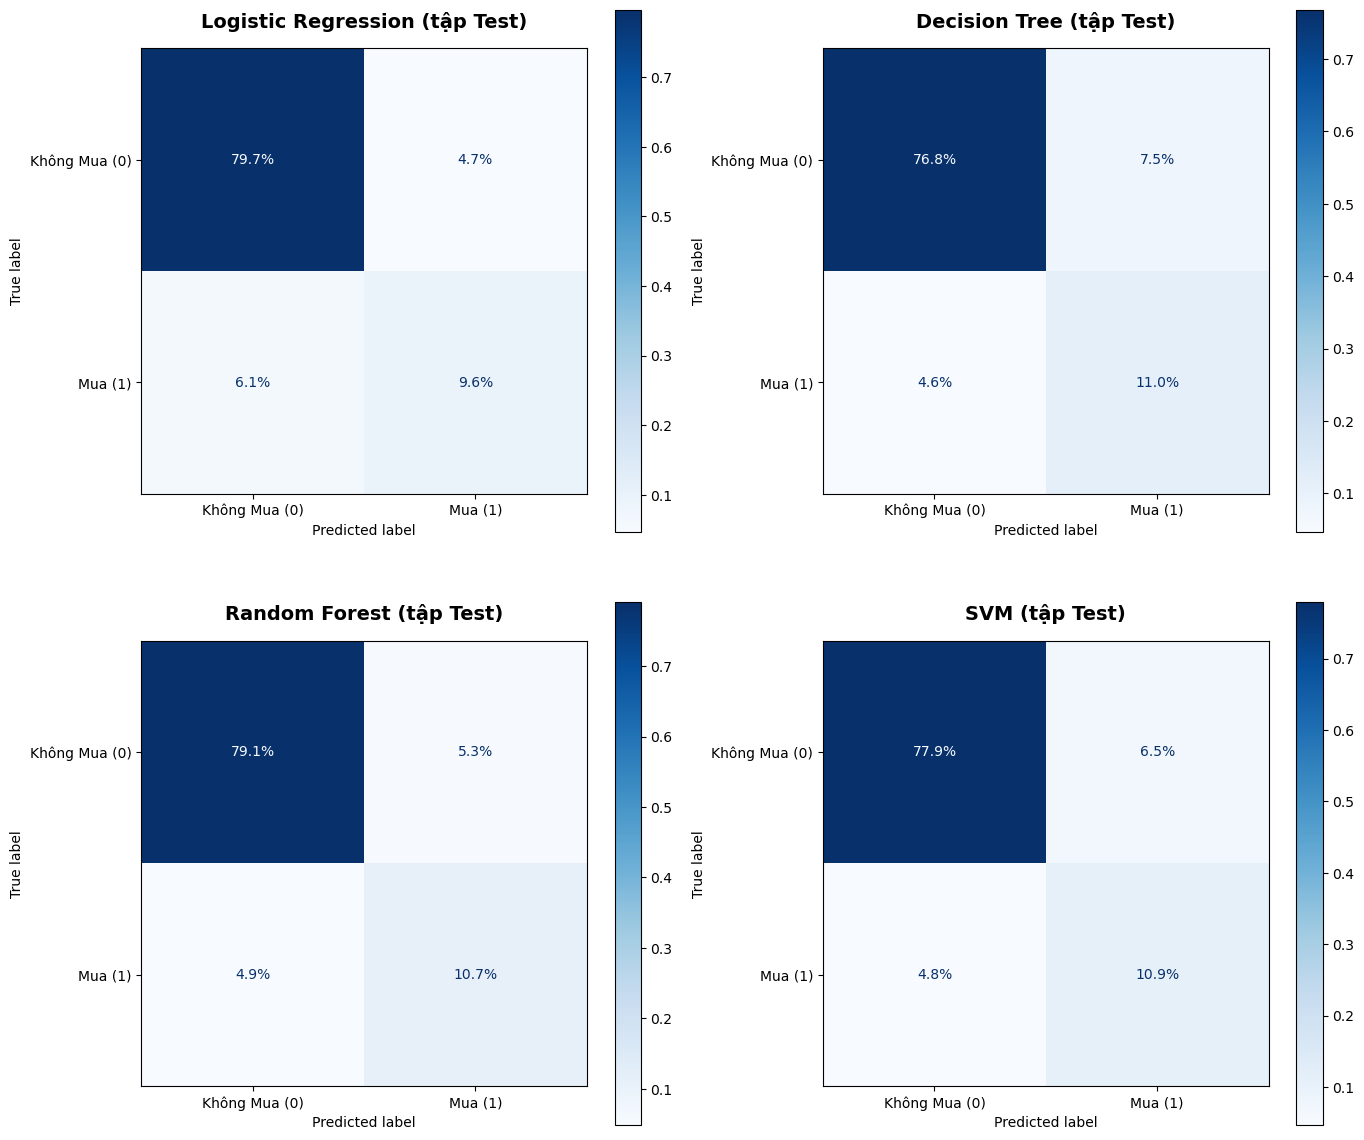

In [47]:
# 1. Thiết lập khung hình vẽ (Lưới 2x2 cho 4 mô hình)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
axes = axes.flatten() # Làm phẳng để dễ lặp

print("Đang vẽ Confusion Matrix trên tập Test...")

for i, (name, clf) in enumerate(final_models.items()):
    model_fresh = clone(model)
    over_fresh = clone(over)
    under_fresh = clone(under)
    preprocessor_fresh = clone(preprocessor)
    
    # Xây dựng lại Pipeline (Tạo mới mỗi vòng lặp)
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('oversample', over),
        ('undersample', under),
        ('model', clf)
    ])
    
    # Huấn luyện lại trên toàn bộ tập TRAIN
    # (Cần thiết vì bước trước ta chỉ dự đoán, chưa lưu lại mô hình đã fit)
    pipe.fit(X_train, y_train)
    
    # c. Dự báo trên tập TEST
    y_pred_test = pipe.predict(X_test)
    
    # d. Vẽ Confusion Matrix
    # - values_format='.1%': Định dạng số thập phân
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test, 
        y_pred_test, 
        ax=axes[i], 
        cmap='Blues',
        normalize='all',
        values_format='.1%',
        display_labels=['Không Mua (0)','Mua (1)']
    )
    
    # e. Trang trí
    axes[i].set_title(f'{name} (tập Test)', fontsize=14, fontweight='bold', pad=15)
    axes[i].grid(False)

plt.tight_layout()
plt.show()

#### Biểu đồ ROC

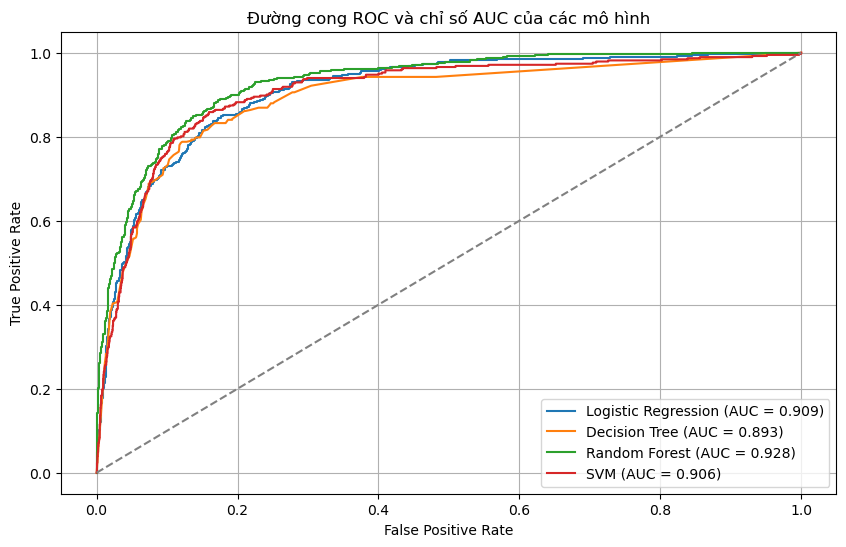

In [48]:
plt.figure(figsize=(10, 6))

for name, model in final_models.items():
    model_fresh = clone(model)
    over_fresh = clone(over)
    under_fresh = clone(under)
    preprocessor_fresh = clone(preprocessor)
    
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('oversample', over),
        ('undersample', under),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    
    y_prob = pipe.predict_proba(X_test)[:, 1]
    
    # Tính ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Tính AUC
    auc_score = roc_auc_score(y_test, y_prob)
    
    # Vẽ đường ROC
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.3f})")

# Đường chéo tham chiếu
plt.plot([0, 1], [0, 1], 'grey', linestyle='--')

# Label
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Đường cong ROC và chỉ số AUC của các mô hình')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### Đường cong Precision - Recall

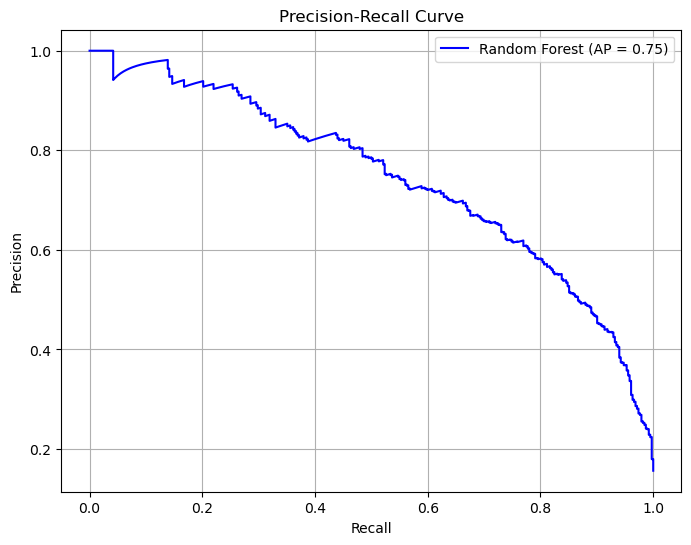

In [52]:
over_fresh = clone(over)
under_fresh = clone(under)
preprocessor_fresh = clone(preprocessor)

full_pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversample', over),
    ('undersample', under),
    ('model', RandomForestClassifier(n_estimators=200, min_samples_leaf=1, max_depth=20, criterion='entropy', random_state=42))
])
full_pipeline_rf.fit(X_train, y_train)

y_prob = full_pipeline_rf.predict_proba(X_test)[:, 1]

# Tính toán
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Random Forest (AP = {avg_precision:.2f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

#### Minh họa một cây quyết định trong Random Forest

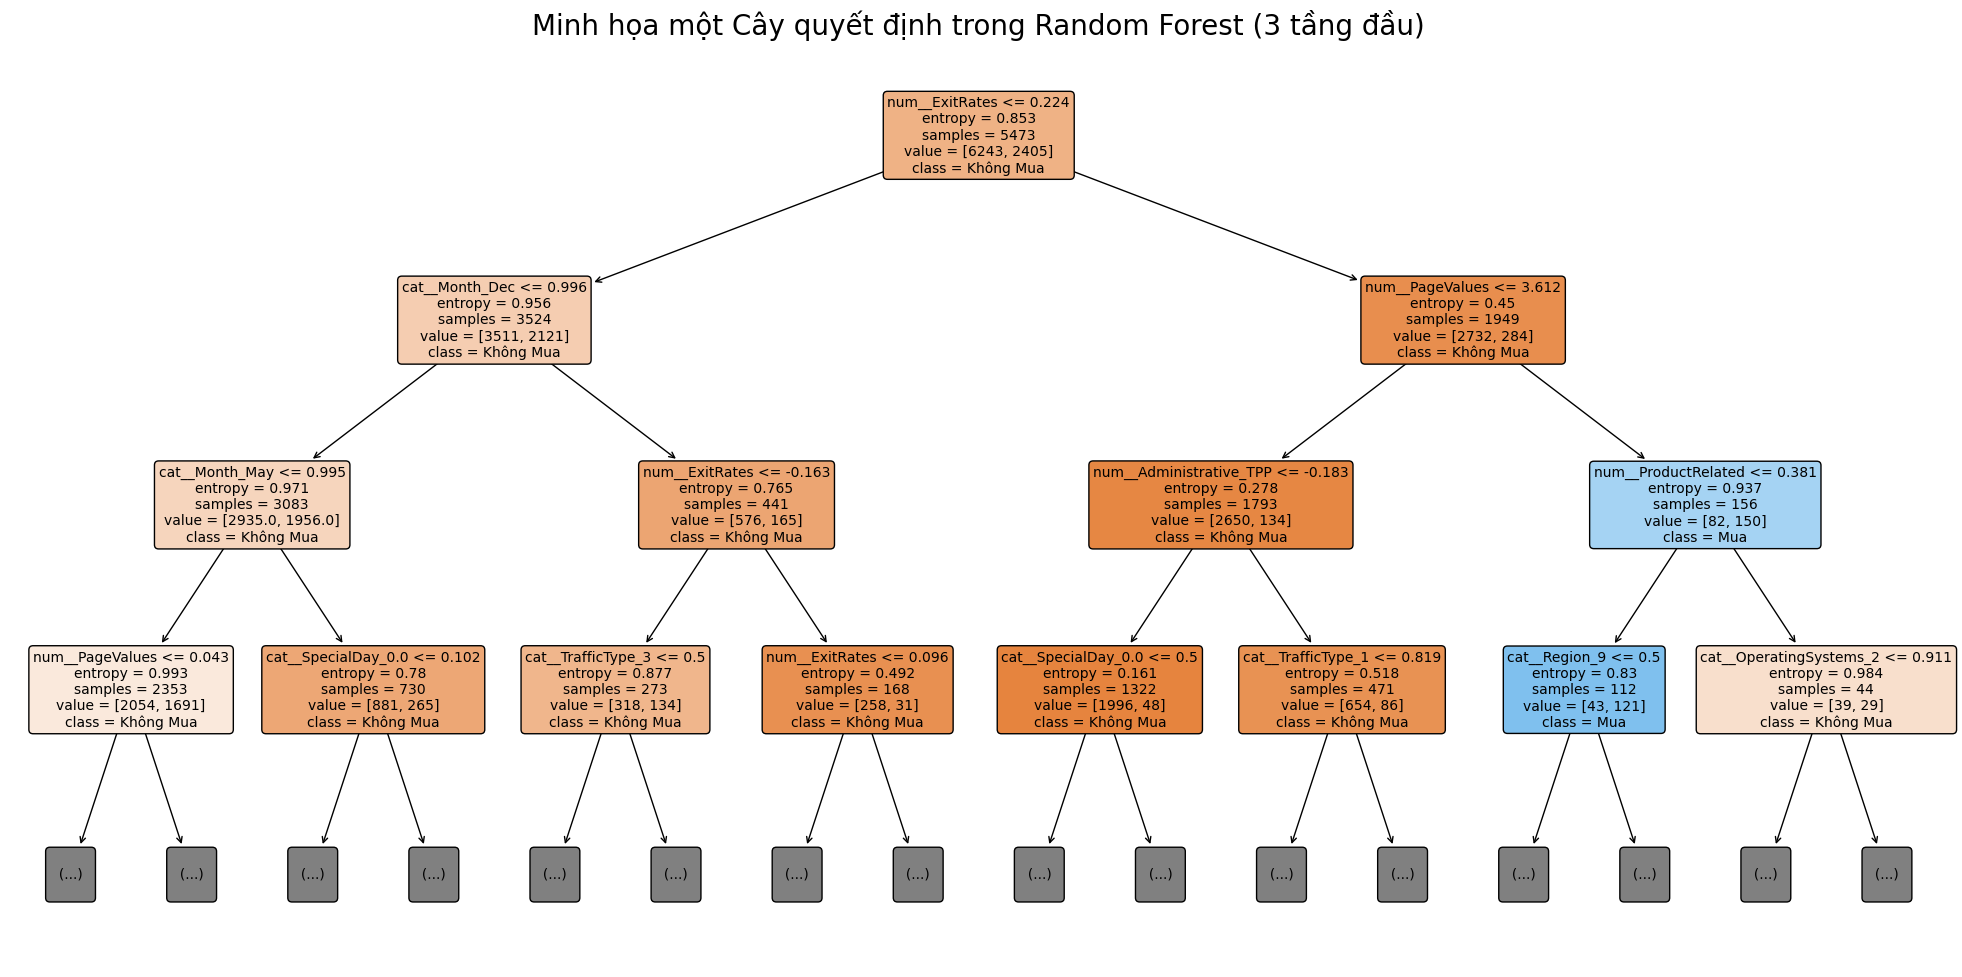

In [53]:
# 1. Lấy mô hình Random Forest từ Pipeline tốt nhất
# (Giả sử full_pipeline_rf là kết quả best_estimator_ từ RandomizedSearch)
rf_model = full_pipeline_rf.named_steps['model']

# 2. Lấy bộ tiền xử lý để lấy tên các đặc trưng (Features)
preprocessor = full_pipeline_rf.named_steps['preprocessor']
feature_names = preprocessor.get_feature_names_out()

# 3. Chọn ra một cây bất kỳ để vẽ (Ví dụ: cây số 0)
single_tree = rf_model.estimators_[0] 

plt.figure(figsize=(25, 12)) # Kích thước hình lớn

plot_tree(
    single_tree,
    feature_names=feature_names,  # Gán tên biến
    class_names=['Không Mua', 'Mua'], # Gán tên lớp (0 và 1)
    filled=True,        
    rounded=True,       
    fontsize=10,        
    max_depth=3
)

plt.title("Minh họa một Cây quyết định trong Random Forest (3 tầng đầu)", fontsize=20)
plt.show()